In [ ]:
!pip install matplotlib

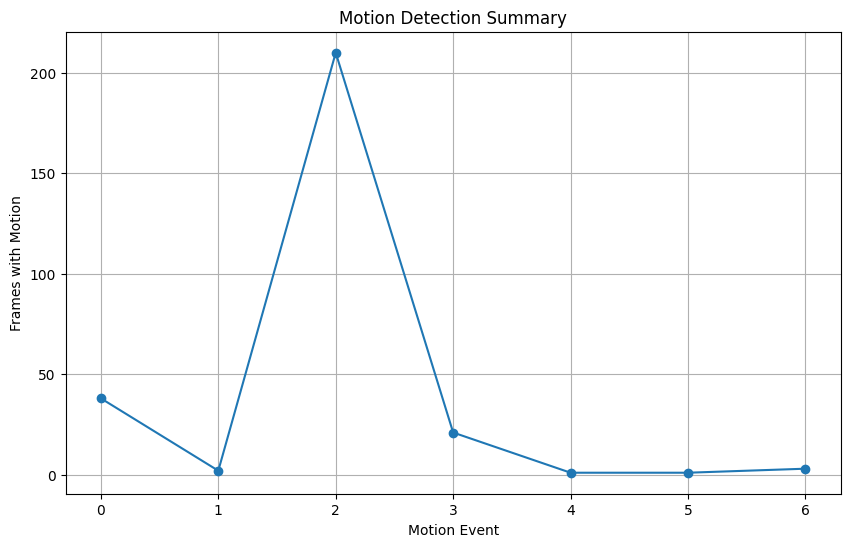

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Set up video capture
    video_path = "video.mp4"  # Replace with your video file path
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error opening video file.")
        return

    # Read the first frame to initialize the background model
    ret, prev_frame = cap.read()
    if not ret:
        print("Error reading video frame.")
        return

    # Convert the frame to grayscale
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    # Variables to store motion detection information
    motion_frames = 0
    motion_durations = []

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Convert the current frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute the absolute difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(gray, prev_gray)

        # Threshold the difference image to detect motion
        _, thresh = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)

        # Find contours in the thresholded image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        motion_detected = False
        # Check if motion is detected in the frame
        for contour in contours:
            if cv2.contourArea(contour) > 500:  # Adjust this threshold as needed
                motion_detected = True
                break

        if motion_detected:
            motion_frames += 1
        else:
            if motion_frames > 0:
                motion_durations.append(motion_frames)
            motion_frames = 0

        # Update the previous frame
        prev_gray = gray

    cap.release()
    cv2.destroyAllWindows()

    # Create the final plot of motion durations
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(motion_durations)), motion_durations, marker='o')
    plt.xlabel('Motion Event')
    plt.ylabel('Frames with Motion')
    plt.title('Motion Detection Summary')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()